<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/Electro%20Pi%20Scholarship/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from  sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [81]:
class EDA_atuomated:
  def __init__(self,dataset):
    self.dataset = dataset
  def run_all(self):
    df = pd.read_csv(self.dataset)
    print('1. Visulize correlation: \n')
    cor = df.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(cor,annot=True)
    plt.show()
    print('\n2. Cheking missing values: \n') 
    df.info()
    print(' \n********************************************************* \n')
    print(df.isna().sum())
    print('\n3. Visulize missing values: \n')
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title('dataset')
        plt.show()
    print('\n4. examining features: \n')
    numeric_features = []
    categorical_features = []
    bol_features = []
    for col in df.columns:
      if (df[col].dtype == np.float64 or df[col].dtype == np.int64):
        numeric_features.append(col)
      if(df[col].dtype == np.object_):
        categorical_features.append(col)
      if(df[col].dtype == np.bool_):
        bol_features.append(col)
    print(numeric_features)
    print('****************************************************************************')
    print(f'There is {len(numeric_features)} numeric features.') 
    print('----------------------------------------------------------------------------')
    print(categorical_features)
    print('****************************************************************************')
    print(f'There is {len(categorical_features)} categorical features.')
    print('----------------------------------------------------------------------------')
    print(bol_features)
    print('****************************************************************************')
    print(f'There is {len(bol_features)} bol features.')

    print('\n5. Filling missing values: \n')
    cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
    integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
    for column in df:
     if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        if(column in integer_columns):
            df[column]=df[column].fillna(df[column].mean())
    
    print(print(df.isna().sum()))

    print('\n6. Plotting Charts based on randomly selecting features:\n')
    col = random.choice(categorical_features)
    print(f'\nfeature name: {col} \n')
    label = df[col].unique()
    data = df[col].value_counts()
    plt.figure(figsize=(8,8))
    plt.pie(x=data,labels=label,autopct='%.0f%%',shadow=True,)
    plt.legend()
    plt.show()
 
    print('\n7. handling bool & object datatype.  When there is date feature will be converted to datetime. Drop un necessary columns: \n')
    for col in df.columns:
      if col == 'date' or col == 'Date':
        df[col] = pd.to_datetime(df[col])

    df.replace({False:0 , True:1},inplace=True)
    le = LabelEncoder()
    cat_fea=df.select_dtypes(include=['object']).columns.tolist()
    df[cat_fea] = df[cat_fea].apply(le.fit_transform)
  
    for column in df.columns:
      if column == 'id' or column == 'ID' or column == 'name' or column == 'Name':
        df.drop(column,axis=1,inplace=True)
    print(df.info())

   

    print('\n8. Show the Data: \n')
    return df.head()

    
    

## Data Police Shooting

1. Visulize correlation: 



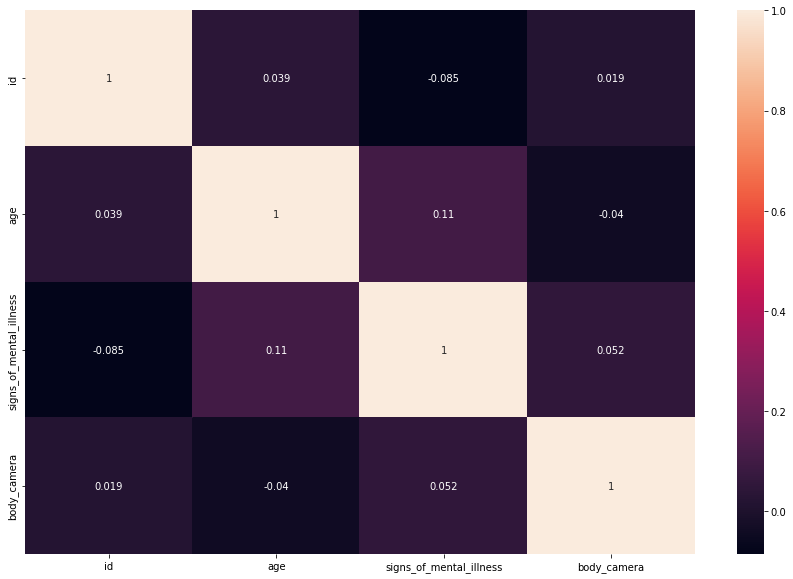


2. Cheking missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   

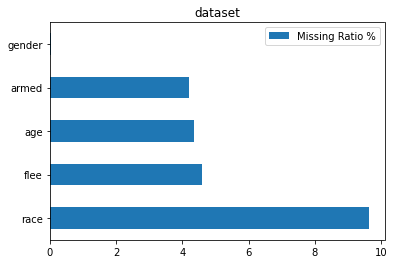


4. examining features: 

['id', 'age']
****************************************************************************
There is 2 numeric features.
----------------------------------------------------------------------------
['name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'threat_level', 'flee']
****************************************************************************
There is 10 categorical features.
----------------------------------------------------------------------------
['signs_of_mental_illness', 'body_camera']
****************************************************************************
There is 2 bol features.

5. Filling missing values: 

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illn

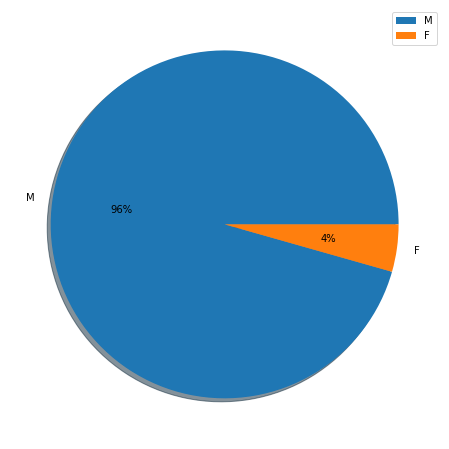


7. handling bool & object datatype.  When there is date feature will be converted to datetime. Drop un necessary columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     5416 non-null   datetime64[ns]
 1   manner_of_death          5416 non-null   int64         
 2   armed                    5416 non-null   int64         
 3   age                      5416 non-null   float64       
 4   gender                   5416 non-null   int64         
 5   race                     5416 non-null   int64         
 6   city                     5416 non-null   int64         
 7   state                    5416 non-null   int64         
 8   signs_of_mental_illness  5416 non-null   int64         
 9   threat_level             5416 non-null   int64         
 10  flee                     5416 n

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,0,37,53.0,1,0,2035,47,1,0,2,0
1,2015-01-02,0,37,47.0,1,5,36,37,0,0,2,0
2,2015-01-03,1,84,23.0,1,2,2415,16,0,1,2,0
3,2015-01-04,0,83,32.0,1,5,1967,4,1,0,2,0
4,2015-01-04,0,61,39.0,1,2,701,5,0,0,2,0


In [82]:
dataset = '/content/gdrive/MyDrive/electro pi scholarship/fatal-police-shootings-data.csv'
a = EDA_atuomated(dataset)
a.run_all()

## Retail Data Analytics

1. Visulize correlation: 



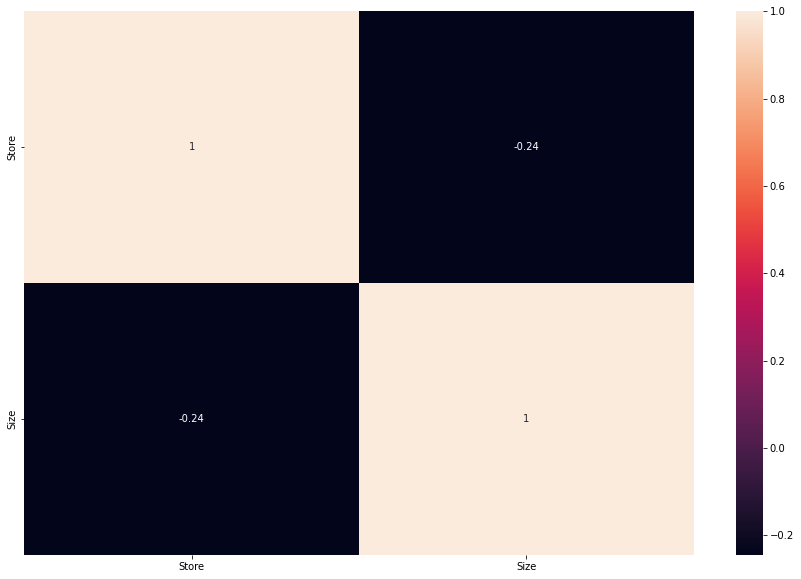


2. Cheking missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
 
********************************************************* 

Store    0
Type     0
Size     0
dtype: int64

3. Visulize missing values: 


4. examining features: 

['Store', 'Size']
****************************************************************************
There is 2 numeric features.
----------------------------------------------------------------------------
['Type']
****************************************************************************
There is 1 categorical features.
----------------------------------------------------------------------------
[]
*************************************************************************

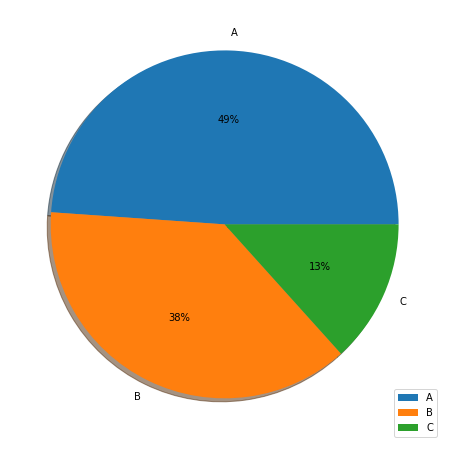


7. handling bool & object datatype.  When there is date feature will be converted to datetime. Drop un necessary columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Store   45 non-null     int64
 1   Type    45 non-null     int64
 2   Size    45 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB
None

8. Show the Data: 



,Store,Type,Size
0,1,0,151315
1,2,0,202307
2,3,1,37392
3,4,0,205863
4,5,1,34875


In [85]:
# stores dataset
stores_dataset = '/content/gdrive/MyDrive/electro pi scholarship/stores data-set.csv'
a = EDA_atuomated(stores_dataset)
a.run_all()

1. Visulize correlation: 



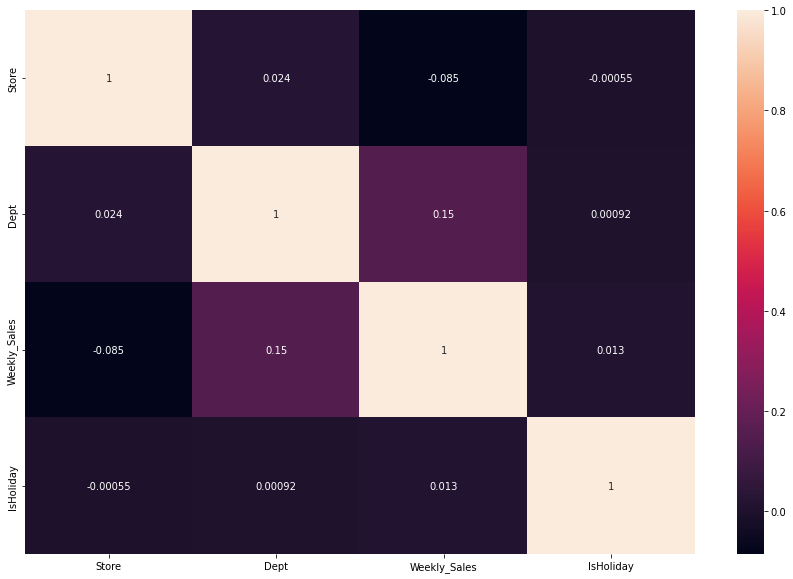


2. Cheking missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
 
********************************************************* 

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

3. Visulize missing values: 


4. examining features: 

['Store', 'Dept', 'Weekly_Sales']
****************************************************************************
There is 3 numeric features.
----------------------------------------------------------------------------
['Date']
********************************

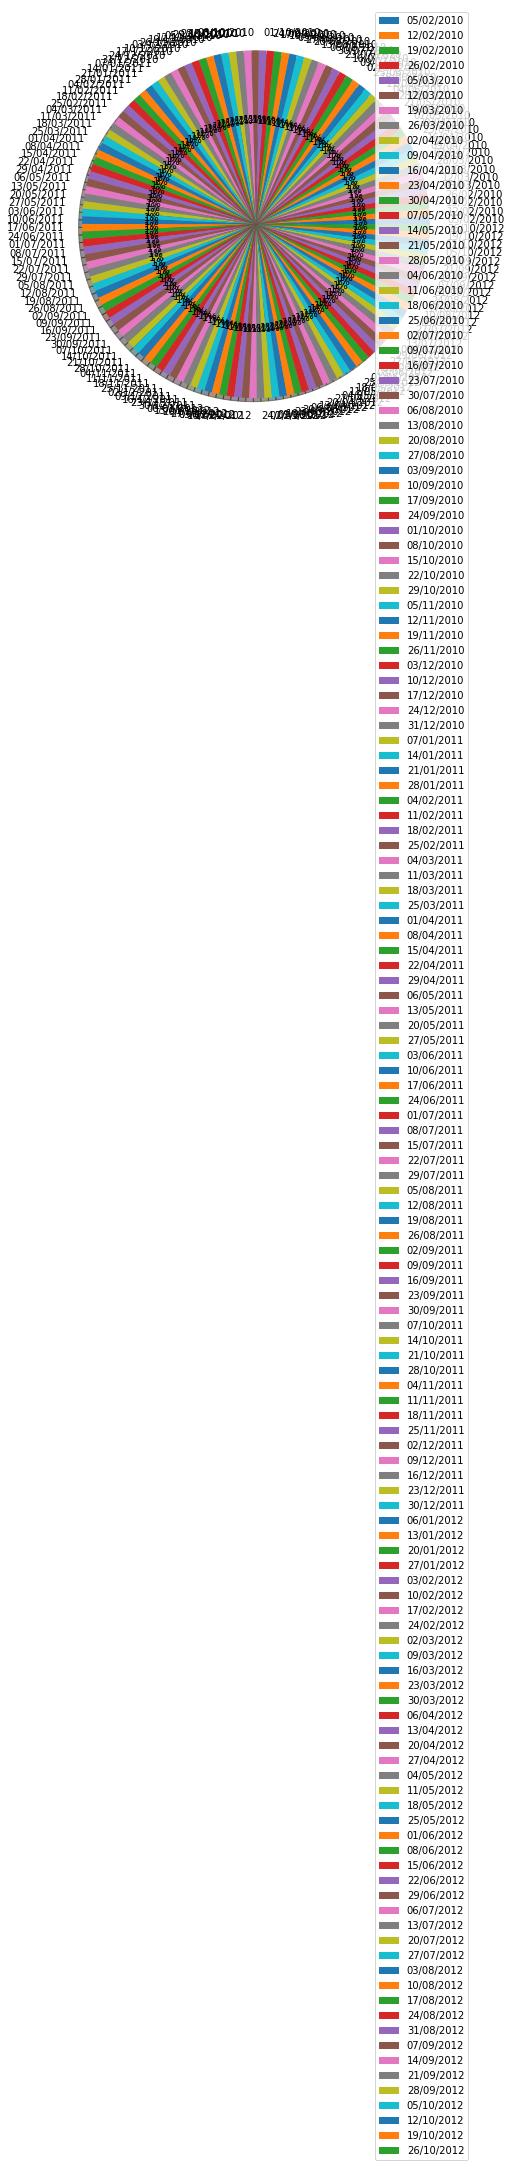


7. handling bool & object datatype.  When there is date feature will be converted to datetime. Drop un necessary columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 16.1 MB
None

8. Show the Data: 



,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,0
1,1,1,2010-12-02,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-05-03,21827.90,0


In [89]:
# sales dataset
sales_dataset = '/content/gdrive/MyDrive/electro pi scholarship/sales data-set.csv'
a = EDA_atuomated(sales_dataset)
a.run_all()

1. Visulize correlation: 



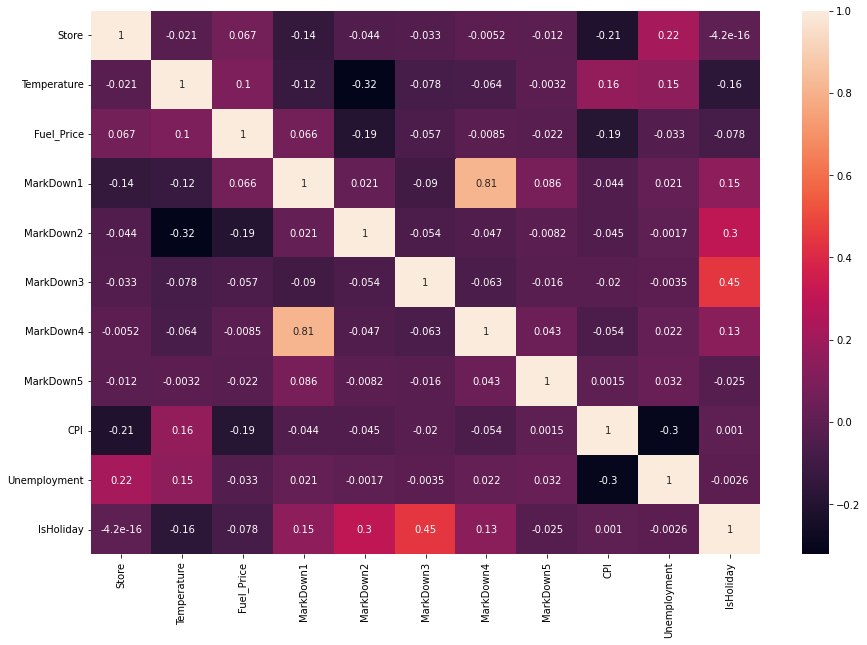


2. Cheking missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
 
********************************************************* 

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269


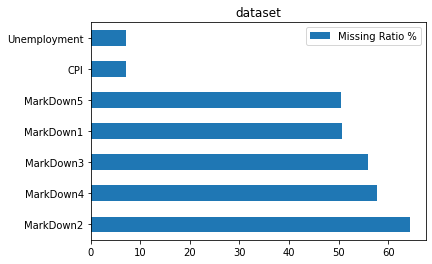


4. examining features: 

['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
****************************************************************************
There is 10 numeric features.
----------------------------------------------------------------------------
['Date']
****************************************************************************
There is 1 categorical features.
----------------------------------------------------------------------------
['IsHoliday']
****************************************************************************
There is 1 bol features.

5. Filling missing values: 

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64
None

6. Plotting Charts based on randomly selecting features:


feature name: Date 



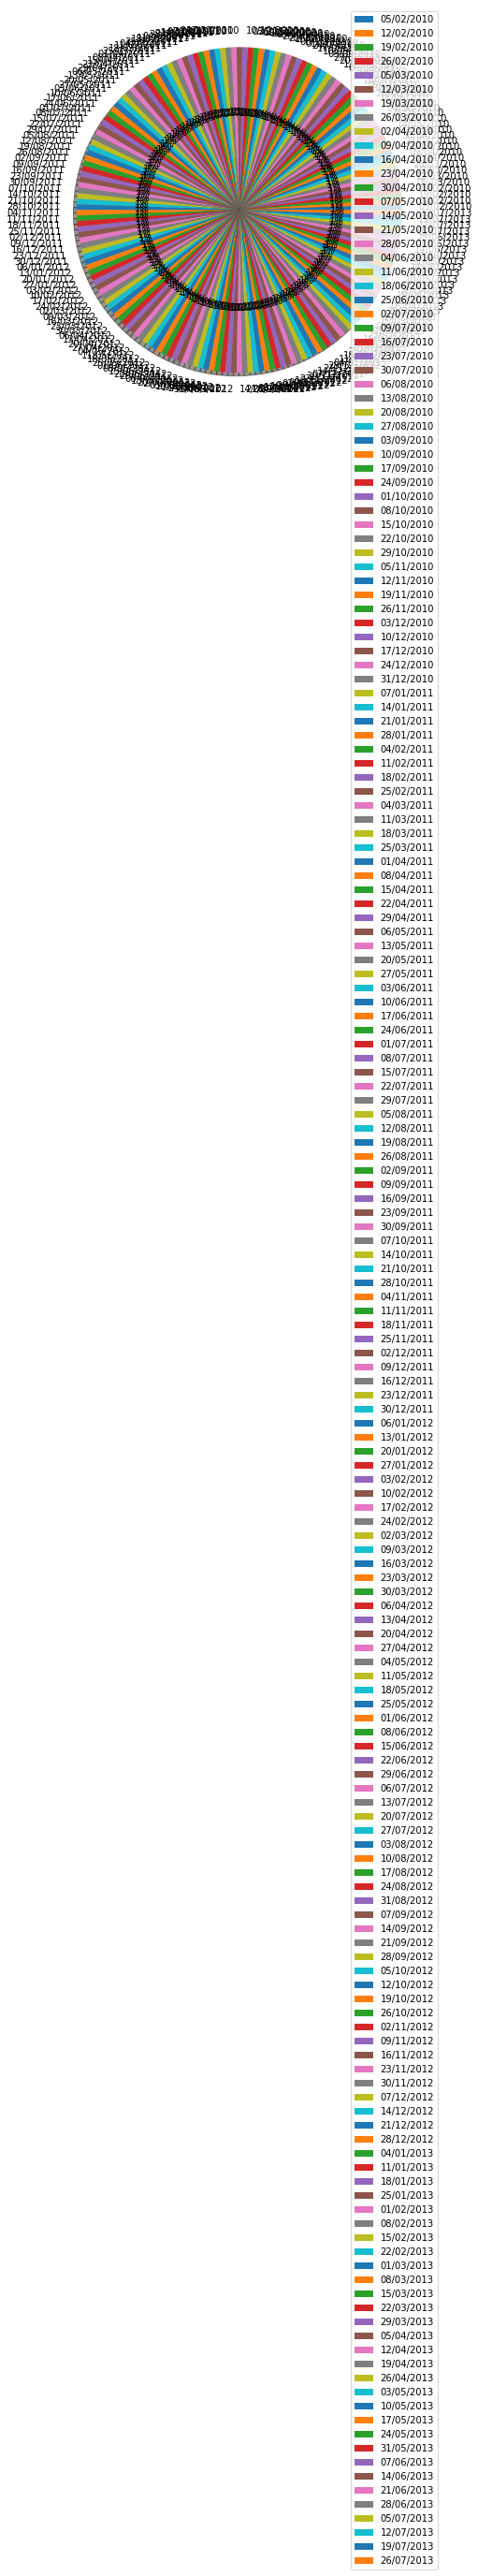


7. handling bool & object datatype.  When there is date feature will be converted to datetime. Drop un necessary columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 767.9 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,0
1,1,2010-12-02,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,0
4,1,2010-05-03,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,0


In [90]:
# feature dataset
feature_dataset = '/content/gdrive/MyDrive/electro pi scholarship/Features data set.csv'
a = EDA_atuomated(feature_dataset)
a.run_all()